# Statistical thinking in Python part 2

## Parameter estimation by optimization
Estimate parameters
Compute confidence Intervals
Perform linear regressions
Test hypotheses


### ECDF
An empirical cumulative distribution function (also called the empirical distribution function, ECDF, or just EDF) and a cumulative distribution function are basically the same thing: they are both probability models for data. However, while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data. To put this another way, the ECDF is the probability distribution you would get if you sampled from your sample, instead of the population. Let’s say you have a set of experimental (observed) data x1, x2 …,xn. The EDF will give you the fraction of sample observations less than or equal to a particular value of x.


In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

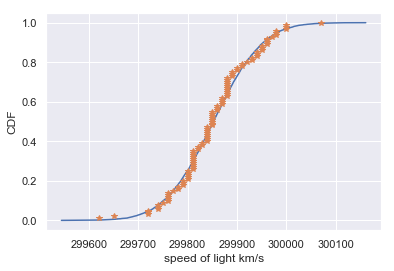

In [27]:
import pandas as pd
#data michelson_speed_of_light
michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light.head(3)
#select just one column into panda.core_series of the actual speed from table
michelson_actual_speed=michelson_speed_of_light['velocity of light in air (km/s)']
import numpy as np


# ECDF - Empirical Cumulative Distribution Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

np.random.seed(42)

#compute mean and standard deviation of just one column
mean=np.mean(michelson_actual_speed)
std=np.std(michelson_actual_speed)


samples = np.random.normal(mean, std, 10000)
#x,y=ecdf(michelson_speed_of_light)
#normal data for reference (represented by a line)
x_theor, y_theor=ecdf(samples)
#actual data represented by * on a graph
x,y=ecdf(michelson_actual_speed)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
_=plt.plot(x_theor, y_theor)
_=plt.plot(x,y,marker='*', linestyle='none')
_=plt.xlabel('speed of light km/s')
_=plt.ylabel('CDF')
plt.show()

In [2]:
print("correct mean", mean)
print("correct std", std)

correct mean 299852.4
correct std 78.61450247886843


### CDF with bad estimate of st.dev
Empirical Cumulative Distribution Function

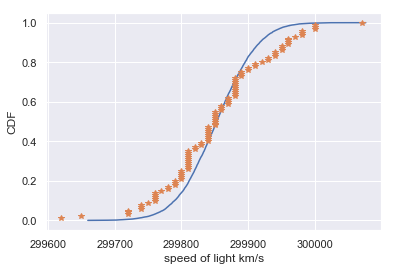

In [5]:
#CDF with bad estimate of st.dev
bad_std=50.0
samples = np.random.normal(mean, bad_std, 10000)
#x,y=ecdf(michelson_speed_of_light)
#normal data for reference (represented by a line)
x_theor_bad, y_theor_bad=ecdf(samples)
#actual data represented by * on a graph
x,y=ecdf(michelson_actual_speed)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
_=plt.plot(x_theor_bad, y_theor_bad)
_=plt.plot(x,y,marker='*', linestyle='none')
_=plt.xlabel('speed of light km/s')
_=plt.ylabel('CDF')
plt.show()

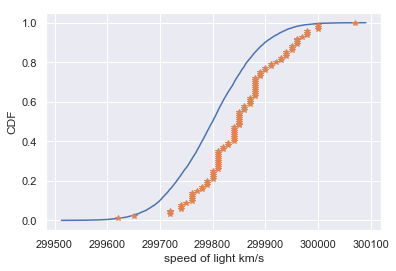

In [6]:
### CDF with bad estimate of mean
bad_mean=299800.4
samples = np.random.normal(bad_mean, std, 10000)
#x,y=ecdf(michelson_speed_of_light)
#normal data for reference (represented by a line)
x_theor_bad, y_theor_bad=ecdf(samples)
#actual data represented by * on a graph
x,y=ecdf(michelson_actual_speed)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
_=plt.plot(x_theor_bad, y_theor_bad)
_=plt.plot(x,y,marker='*', linestyle='none')
_=plt.xlabel('speed of light km/s')
_=plt.ylabel('CDF')
plt.show()

### Optimal parameters - parameter values that bring the model in closest agreement with the data
Packages to do statistical inference <br>
scipy.stats <br>
statmodels <br>
hacker stats with numpy <br>


## Linear regression with least squares

Least squares - the process of finding the parameters for which the sum of the squares of the residuals is minimal


### least squares with np.polyfit

In [ ]:
slope, intercept = np.polyfit(total_votes, dem_share,1)

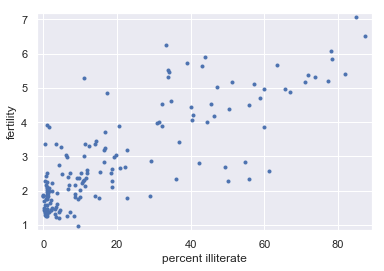

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

### Pearson correlation coefficient
The Pearson correlation coefficient measures the linear relationship
 between two datasets. Strictly speaking, Pearson's correlation requires
 that each dataset be normally distributed. Like other correlation
 coefficients, this one varies between -1 and +1 with 0 implying no
 correlation. Correlations of -1 or +1 imply an exact linear
 relationship. Positive correlations imply that as x increases, so does
 y. Negative correlations imply that as x increases, y decreases.
 
 or could be calculated like this:
import numpy
numpy.corrcoef(list1, list2)[0, 1]

In [10]:
from scipy.stats.stats import pearsonr
# Show the Pearson correlation coefficient between illiteracy and fertility.
print(pearsonr(illiteracy, fertility))

(0.8041324026815345, 5.635092985976559e-38)


In [11]:
import numpy
print(numpy.corrcoef(illiteracy, fertility)[0, 1])

0.8041324026815341


### another alternative:
from scipy.stats import linregress
linregress(a, b)

In [12]:
from scipy.stats import linregress
linregress(illiteracy, fertility)

LinregressResult(slope=0.049798548090634186, intercept=1.888050610636557, rvalue=0.804132402681534, pvalue=5.635092985977801e-38, stderr=0.0029103460309278166)

In [13]:
slope, intercept = np.polyfit(illiteracy, fertility,1)

In [14]:
print('slope',slope)
print('intercept',intercept)

slope 0.04979854809063423
intercept 1.888050610636557


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


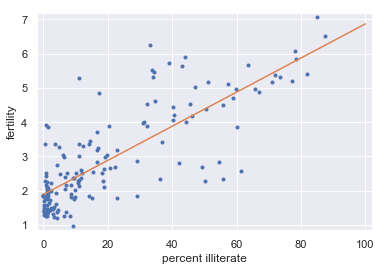

In [15]:
'''
Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where 
a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate,
probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy.
We can find the best fit line using np.polyfit().
Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)
INSTRUCTIONS
100XP
-Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and
illiteracy on the x-axis.
-Print out the slope and intercept from the linear regression.
-To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute 
the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
-Plot the data and the regression line on the same plot. Be sure to label your axes.
-Hit 'Submit Answer' to display your plot.
'''

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

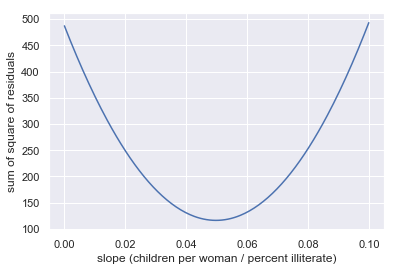

In [16]:
'''
How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and
intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual
sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus
the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then,
plot the RSS vs. the slope. Where is it minimal?
INSTRUCTIONS
100XP
-Specify the values of the slope for which to compute the RSS. Use np.linspace() to get 200 points
in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you
could use np.linspace() like so: np.linspace(0, 0.5, 100).
-Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above.
The empty_like() function returns a new array with the same shape and type as a given array 
(in this case, a_vals).
-Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by 
np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in 
your namespace. Here, fertility is the y_data and illiteracy the x_data.
-Plot the RSS (rss) versus slope (a_vals).
Hit 'Submit Answer' to see the plot!
'''
import numpy as np
import matplotlib.pyplot as plt

# Specify slopes to consider: a_vals
#Specify the values of the slope for which to compute the RSS. Use np.linspace() to get 200 points
#in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you
#could use np.linspace() like so: np.linspace(0, 0.5, 100).
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
#The empty_like() function returns a new array with the same shape and type as a given array 
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


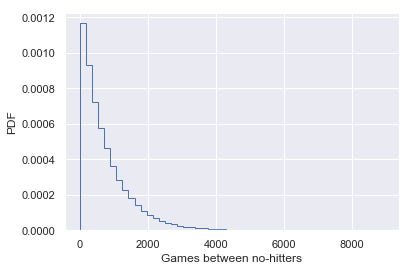

In [17]:
'''
How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball
is stored in the array nohitter_times.
If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is
Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which
we will call \tau
\tau, the typical interval time. The value of the parameter τ that makes the exponential distribution 
best match the data is the mean interval time (where time is in units of number of games) between no-hitters.
Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history 
of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found
and plot the histogram as an approximation to the PDF.
NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.
INSTRUCTIONS
100XP
-Seed the random number generator with 42.
-Compute the mean time (in units of number of games) between no-hitters.
-Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
-Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
-Show your plot.
'''
import numpy as np
import matplotlib.pyplot as plt

nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [18]:
print(tau)

763.0358565737051


## Bootstrap confidence intervals

Getting the terminology down
Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you 
often will read and hear other data scientists using different terminology for bootstrap samples and 
replicates. This is even more reason why we need everything to be clear and consistent for this course. 
So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set 
with n repeated measurements, a bootstrap sample is an array of length n that was drawn from the original
data with replacement. 

What is a bootstrap replicate?
ANSWER THE QUESTION
50XP
Possible Answers
-Just another name for a bootstrap sample.
-A single value of a statistic computed from a bootstrap sample.
-An actual repeat of the measurements.

In [ ]:
'''
Bootstrapping by hand
To help you gain intuition about how bootstrapping works, imagine you have a data set that has only
three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1]
are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to
jot down the samples on a piece of paper.
(These are too few data to get meaningful results from bootstrap procedures, but this example is useful
for intuition.)
INSTRUCTIONS
50XP
Possible Answers
-There are 3 unique samples, and the maximum mean is 0.
-There are 10 unique samples, and the maximum mean is 0.
-There are 10 unique samples, and the maximum mean is 1.
-There are 27 unique samples, and the maximum mean is 0.
-There are 27 unique samples, and the maximum mean is 1.
'''
# There are 27 unique samples, and the maximum mean is 1.

In [37]:
## Resampling engine np.random.choice()
import numpy as np
np.random.choice([1,2,3,4,5], size=5)

array([4, 4, 4, 2, 4])

In [39]:
##computing a boostrap replicate
bs_sample = np.random.choice(michelson_actual_speed, size=100)
np.mean(bs_sample)

299855.1

In [40]:
np.median(bs_sample)

299850.0

In [41]:
np.std(bs_sample)

75.72971675636983

In [42]:
##boostrap relicate function
def bootstrap_replicate_ld(data,func):
    """generate boostrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bootstrap_replicate_ld(michelson_actual_speed,np.mean)

299853.6

In [43]:
bootstrap_replicate_ld(michelson_actual_speed,np.mean)

299861.0

In [44]:
bootstrap_replicate_ld(michelson_actual_speed,np.mean)

299855.2

In [46]:
## many boostrap replicates
bs_replicate = np.empty(10000)

for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_ld(michelson_actual_speed,np.mean)

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


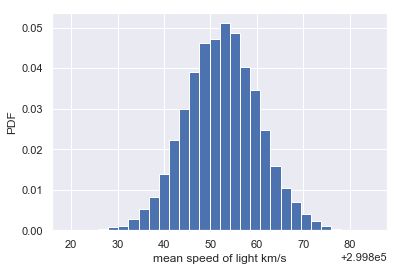

In [47]:
##plotting a histogram with boostrap replicate
_ = plt.hist(bs_replicates, bins=30,normed=True)
_ = plt.xlabel('mean speed of light km/s')
#distribution function
_ = plt.ylabel('PDF')
plt.show()

### confidence intervals of a statistic

If we repeat measurement again and again, p% of the observed values would lie within a confindence interval

### boostrap confidence interval

In [49]:
conf_int=np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[299837.0975 299868.2   ]


C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


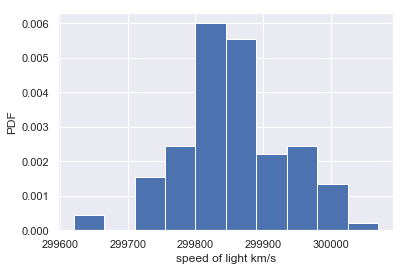

In [51]:
##plotting a histogram with boostrap replicate
_ = plt.hist(michelson_actual_speed, bins=10,normed=True)
_ = plt.xlabel('speed of light km/s')
#distribution function
_ = plt.ylabel('PDF')
plt.show()

In [32]:
'''
Generating many bootstrap replicates
The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write
another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the
data set. This function will come in handy for you again and again as you compute confidence intervals
and later when you do hypothesis tests.
For your reference, the bootstrap_replicate_1d() function is provided below:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
INSTRUCTIONS
100XP
-Define a function with call signature draw_bs_reps(data, func, size=1).
-Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap
replicates.
-Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer
to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the
replicate in the appropriate index of bs_replicates.
-Return the array of replicates bs_replicates. This has already been done for you.
'''
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

95% confidence interval = [661.56942231 871.87320717] games


C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


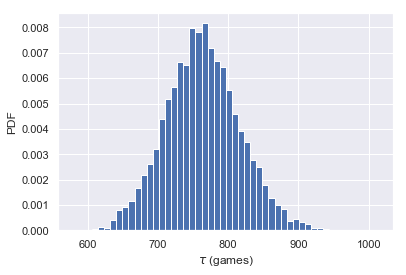

In [33]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


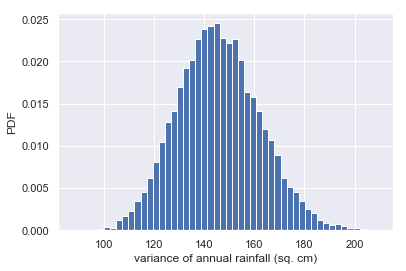

In [52]:
'''
Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for
other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise,
you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather
Station and plot the histogram of the replicates.
Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided
below for your reference:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
INSTRUCTIONS
100XP
-Draw 10000 bootstrap replicates of the variance in annual rainfall using your draw_bs_reps() function.
Hint: Pass in np.var for computing the variance.
-Divide your variance replicates - bs_replicates - by 100 to put the variance in units of square
centimeters for convenience.
-Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.
-Hit 'Submit Answer' to see the plot!
'''
import numpy as np
import matplotlib.pyplot as plt

rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

10.510549150506188
10.618560787866382


C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


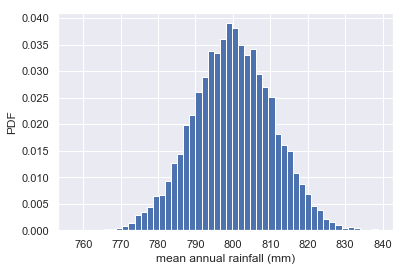

In [53]:
'''
Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability distribution function of the
mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall 
we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over
and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and 
you will see that it is Normal.
In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the 
mean will always be Normally distributed. (This does not hold in general, just for the mean and a 
few other statistics.) The standard deviation of this distribution, called the standard error of the 
mean, or SEM, is given by the standard deviation of the data divided by the square root of the number 
of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics,
you get this same result without the need to derive it, but you will verify this result from your
bootstrap replicates.
The dataset has been pre-loaded for you into an array called rainfall.
INSTRUCTIONS
100XP
-Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the
rainfall array. Hint: Pass in np.mean for func to compute the mean.
-As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
-Compute and print the standard error of the mean of rainfall.
-The formula to compute this is np.std(data) / np.sqrt(len(data)).
-Compute and print the standard deviation of your bootstrap replicates bs_replicates.
-Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
-Hit 'Submit Answer' to see the plot!
'''
import matplotlib.pyplot as plt
import numpy as np


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

[0.04386045 0.05541854]


C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


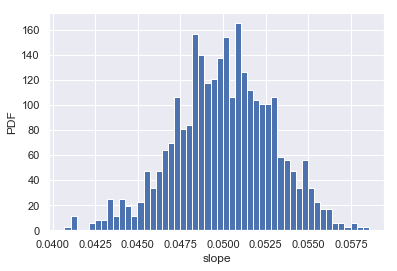

In [36]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps




# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

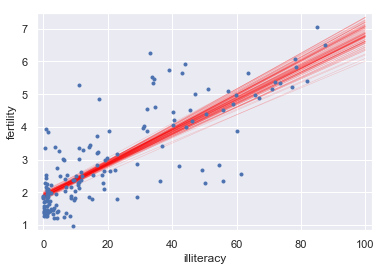

In [52]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

[0.04406164 0.05519215]


C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


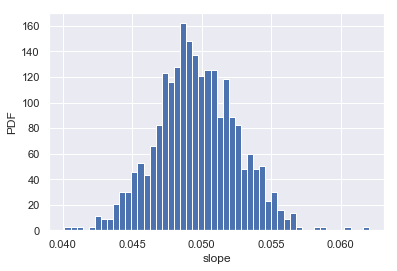

In [53]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

# Formulating and simulating hypotheses
Hypothesis testing - assesment of how reasonable the observed data are assuming a hypothesis is true

Null hypothesis - another name for the hypothesis you are testing

permutation - random reordering of entries in an array

### Generating a permutation sample

In [28]:
import pandas as pd
import numpy as np
#read file
df_swing = pd.read_csv('2008_swing_states.csv')

dem_share = df_swing[['dem_share', 'state']]

dem_share_PA = dem_share.loc[dem_share['state'] == 'PA']
dem_share_OH = dem_share.loc[dem_share['state'] == 'OH']

In [29]:
dem_share_OH.head(3)

,dem_share,state
8,56.94,OH
9,50.46,OH
11,65.99,OH


In [30]:
del dem_share_OH['state']
del dem_share_PA['state']
dem_share_OH.head(3)

,dem_share
8,56.94
9,50.46
11,65.99


In [31]:
#convert to numpy array
dem_share_OH=dem_share_OH.values
dem_share_PA=dem_share_PA.values
dem_share_OH=np.array(dem_share_OH)
dem_share_PA=np.array(dem_share_PA)

In [32]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_both

array([[60.08],
       [40.64],
       [36.07],
       [41.21],
       [31.04],
       [43.78],
       [44.08],
       [46.85],
       [44.71],
       [46.15],
       [63.1 ],
       [52.2 ],
       [43.18],
       [40.24],
       [39.92],
       [47.87],
       [37.77],
       [40.11],
       [49.85],
       [48.61],
       [38.62],
       [54.25],
       [34.84],
       [47.75],
       [43.82],
       [55.97],
       [58.23],
       [42.97],
       [42.38],
       [36.11],
       [37.53],
       [42.65],
       [50.96],
       [47.43],
       [56.24],
       [45.6 ],
       [46.39],
       [35.22],
       [48.56],
       [32.97],
       [57.88],
       [36.05],
       [37.72],
       [50.36],
       [32.12],
       [41.55],
       [54.66],
       [57.81],
       [54.58],
       [32.88],
       [54.37],
       [40.45],
       [47.61],
       [60.49],
       [43.11],
       [27.32],
       [44.03],
       [33.56],
       [37.26],
       [54.64],
       [43.12],
       [25.34],
       [

In [33]:
#permutation - random reordering of entries in an array
dem_share_perm = np.random.permutation(dem_share_both)

perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

### Test statistics and p-values
a single number that can be computed from observed data and from data you simulate under the null hypothesis
it serves as a basis of comparison between the two

### permutation replicate


In [36]:
np.mean(perm_sample_PA)-np.mean(perm_sample_OH)


0.425561397557658

In [37]:
#original data
np.mean(dem_share_PA)-np.mean(dem_share_OH)

1.1582360922659447

### p-value

The probability of obtaining a value of your test statistics that is at least as extreme as what was observed, under the assumption the null phypothesis is true

NOT THE PROBABILITY that the null hypothesis is true
STATISTICAL SIGNIFICANCE - determined by the smallness of a p-value

Statistical significance does not equal practical significance

## Pipeline for hypothesis testing 
<br>
1. clearly state the null hypothesis <br>
2. Define your test statistic <br>
3. Generate many sets of simulated data asusming the null hypothesis is true<br>
4. Compute ther test statistic for each simulated data set
5. The p=value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

In [39]:
michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light.head(3)
#select just one column into panda.core_series of the actual speed from table
michelson_actual_speed=michelson_speed_of_light['velocity of light in air (km/s)']
newcomb_value = 299860
michelson_shifted= michelson_actual_speed-np.mean(michelson_actual_speed)+\
                    newcomb_value

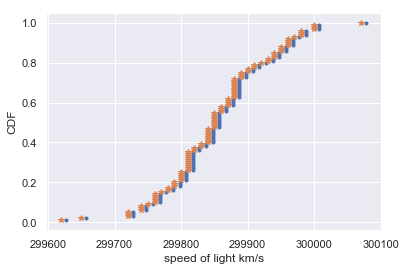

In [48]:
import numpy as np


# ECDF - Empirical Cumulative Distribution Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

np.random.seed(42)

#compute mean and standard deviation of just one column
mean=np.mean(michelson_actual_speed)
std=np.std(michelson_actual_speed)

x_shift, y_shift=ecdf(michelson_shifted)
#actual data represented by # on a graph
x,y=ecdf(michelson_actual_speed)
#shifted data represented by * on a graph
x_shift, y_shift=ecdf(michelson_shifted)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

_=plt.plot(x_shift, y_shift, marker='.', linestyle='none')
_=plt.plot(x,y,marker='*', linestyle='none')
_=plt.xlabel('speed of light km/s')
_=plt.ylabel('CDF')
plt.show()

In [49]:
#Calculating the test statistics
def diff_from_newcomb(data,newcomb_value=299860):
    return np.mean(data) - newcomb_value

diff_obs=diff_from_newcomb(michelson_actual_speed)
diff_obs

-7.599999999976717

In [55]:
#computing the p-value
bs_replicates = draw_bs_reps(michelson_shifted,diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_obs) /10000
p_value

0.1663

### Exercises

In [56]:
##generating a permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


In [58]:
##generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


In [ ]:
#permutation test
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

### Weather test rainy days

In [68]:
import pandas as pd
import numpy as np
#read file
df = pd.read_csv('weather_csv2.csv')

df.head(3)

,yyyy,mm,tmax,tmin,af,rain
0,1883,1,6.3,1.7,6,122.1
1,1883,2,8.0,2.8,2,69.8
2,1883,3,4.8,-1.6,23,29.6


In [69]:
rain_df = df[['mm', 'rain']]
rain_df.head(3)

,mm,rain
0,1,122.1
1,2,69.8
2,3,29.6


In [79]:
rain_july = rain_df.loc[rain_df['mm'] == 7]
rain_november = rain_df.loc[rain_df['mm'] == 11]

In [78]:
rain_july.head(3)

,mm,rain
6,7,77.6
18,7,80.1
30,7,17.8


In [80]:
#delete mm column in both files
del rain_july['mm']
del rain_november['mm']

#convert to mumpy arrays
rain_july=rain_july.values
rain_july=np.array(rain_july)

rain_november=rain_november.values
rain_november=np.array(rain_november)

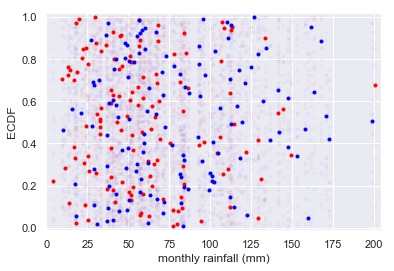

In [83]:
for _ in range(20):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## AB testing
Used by organizations to see if a strategy change gives a better result

Permutation test of clicks through

In [ ]:
import numpy as np

#clickthrough_A and clickthrough_B arrays of 1s and 0s

def diff_frac(data_A,data_B):
    frac_A=np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B-frac_A

diff_frac_obs=diff_frac(clickthrough_A, clickthrough_B)

In [ ]:
#permutations of clicks through
perm_replicates = np.emtry(10000)
for i in range(100000):
    perm_replicates[i] = \
    permutation_replicate(clickthroug_A,clickthrough_B,diff_frac)
p_value=np.sum(perm_replicates >= diff_frac_obs) /10000

In [84]:
##calculating p-value
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


In [91]:
#calculating p-value test on pearson correlation
#replicate 10000 tests on permutable data
fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])




import numpy
# Compute observed correlation: r_obs

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

r_obs = pearson_r(illiteracy, fertility)
print(r_obs)

0.8041324026815341


In [92]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### p-value meaning

In order to understand P values, you must first understand the null hypothesis.

In every experiment, there is an effect or difference between groups that the researchers are testing. It could be the effectiveness of a new drug, building material, or other intervention that has benefits. Unfortunately for the researchers, there is always the possibility that there is no effect, that is, that there is no difference between the groups. This lack of a difference is called the null hypothesis, which is essentially the position a devil’s advocate would take when evaluating the results of an experiment.

<br>
1 indicates a rejection of the null hypothesis at the 5% significance level,<br>
0 indicates a failure to reject the null hypothesis at the 5% significance level.
<br>
P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

High P values: your data are likely with a true null.
Low P values: your data are unlikely with a true null.

In technical terms, a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

In statistical hypothesis testing, the p-value or probability value or significance is, for a given statistical model, the probability that, when the null hypothesis is true, the statistical summary (such as the absolute value of the sample mean difference between two compared groups) would be greater than or equal to the actual observed results.


In the ideal world, we would be able to define a "perfectly" random sample, the most appropriate test and one definitive conclusion. We simply cannot. What we can do is try to optimise all stages of our research to minimise sources of uncertainty. When presenting P values some groups find it helpful to use the asterisk rating system as well as quoting the P value:

P < 0.05 *

P < 0.01 **

P < 0.001

Most authors refer to statistically significant as P < 0.05 and statistically highly significant as P < 0.001 (less than one in a thousand chance of being wrong).

In [93]:
perm_replicates.min()

-0.2650404421833989

In [ ]:
after reading about p-value continue this!
https://github.com/wblakecannon/DataCamp/tree/master/07-statistical-thinking-in-python-(part-2)/5-putting-it-all-together-case-study

## Case study - observing birds from Galapagos islands, sizes of their beaks evolution
## between 1975 and 2012

To motivate this study, we will work with data measured by Peter and Rosemary Grant on the island of Daphne Major on the Galápagos. They have been going to the island every year for over forty years and have been taking a careful inventory of the finches there. We will look at the finch Geospiza scandens. The Grants measured the depths of the beaks (defined as the top-to-bottom thickness of the beak) of all of the finches of this species on the island. We will consider their measurements from 1975 and from 2012. We will investigate if the beaks got deeper over time.
 let's start by loading in the data. The beak depths are stored in 2 files :
 
 

In [1]:
import numpy as np
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns

bd_1975 = pd.read_csv('finch_beaks_1975.csv')
bd_2012 = pd.read_csv('finch_beaks_2012.csv')

In [17]:
bd_1975.shape,bd_2012.shape

((403, 4), (248, 4))

In [2]:
bd_1975.head(3)

,band,species,beak_length,beak_depth
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5


In [18]:
#add year as a column to each table
bd_1975['year']=1975
bd_2012['year']=2012

#combine both tables
df_all=pd.concat([bd_1975,bd_2012])
#quick check
df_all.head(3)

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975


In [19]:
df_all.tail(3)

,band,species,beak_length,beak_depth,year
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012
247,21347,scandens,15.2,9.1,2012


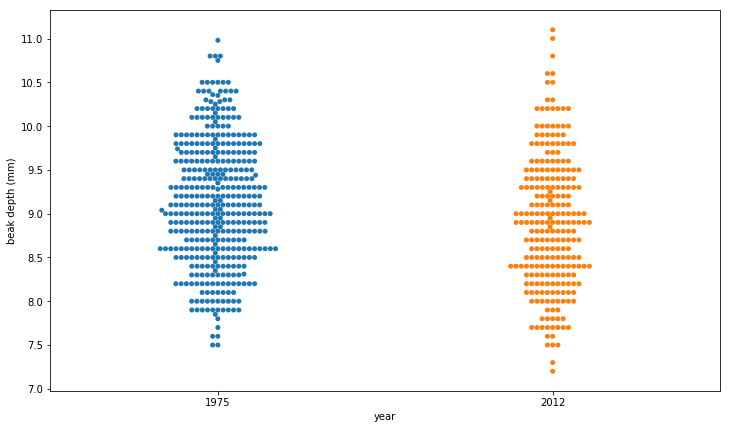

In [20]:
#bee swarm plots of both distributions
plt.figure(figsize=(12,7))
_ = sns.swarmplot(data=df_all, x='year', y='beak_depth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

We can see that in 2012, the beak depth distribution varies more and the values from 2012 might have a higher mean. To make sure, let's do better than just visual looking! Let's plot a ECDF!

In [3]:
#create 2 datasets with beak_depth only
bd_1975_beak_depth=bd_1975['beak_depth']
bd_2012_beak_depth=bd_2012['beak_depth']

## ECDFs of beak depths

We'll use the ecdf() function to generate the ECDFs so we can plot them. I'll define it here so we have it going forward.

In [4]:
# ECDF - Empirical Cumulative Distribution Function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

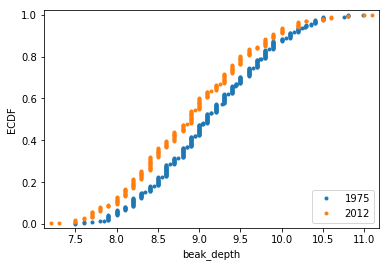

In [5]:
# Compute ECDFs for 1975 and 2012
x_1975, y_1975 = ecdf(bd_1975_beak_depth)
x_2012, y_2012 = ecdf(bd_2012_beak_depth)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('beak_depth')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

Judging from the ECDFs, it seems as though beaks have gotten deeper over time. But now, we would like a statistic to compare. One statistic that comes to mind it the mean. So, let's compare those.

In [6]:
np.mean(bd_1975_beak_depth)


9.12595533498759

In [7]:
np.mean(bd_2012_beak_depth)

8.90282258064517

## Parameter estimates of beak depth

Compute the difference of the sample means : mean_diff

In [8]:
mean_diff=np.mean(bd_2012_beak_depth) - np.mean(bd_1975_beak_depth)
mean_diff

-0.22313275434242108

Here is clearly some variability in beak depth among the birds measured each year, so it is possible that this observation is just due to random chance and the mean beak depth is really not that big. So, we would like to compute a confidence interval on the mean. We will compute the 95% confidence interval.

What is a 95% confidence interval? It can be thought of as follows. If we were to repeat the experiment over and over and over again, 95% of the time, the observed mean would lie in the 95% confidence interval. So, if the confidence intervals of the means of measurements from 1975 and from 2012 overlapped, we might not be so sure that the beaks got deeper due to some underlying selective pressure, but that we just observed deeper beaks as a result of natural variability.

## Bootstrap confidence intervals
Here's the idea: If we could repeat the measurements of the beak depths on Daphne Major, we could do it many many times, and we could then just compute the 2.5th and 97.5th percentiles to get a 95% confidence interval. The problem is, we can't repeat the experiments over and over again. Instead, we will have our computer simulate doing the experiment over and over again. Hacker statistics! We have a set of measurements; we just use them over and over again. Here's what we do to compute a bootstrap estimate of the mean of a set of  n  data points.

Draw  n  data points out of the original data set with replacement. This set of data points is called a bootstrap sample.
Compute the mean of the bootstrap sample. This is called a bootstrap replicate of the mean.
Do this over and over again, storing the results.

So, it is as if we did the experiment over and over again, obtaining a mean each time. Remember, our bootstrap sample has exactly the same number of "measurements" as the original data set. Let's try it with the bd_1975 data (remember the mean beak depth was 8.96 mm). First we'll generate a bootstrap sample. Remember, the function np.random.choice() allows us to sample out of an array with replacement, if we like.

In [9]:
# Get bootstrap replicates of means
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


bs_replicates_1975 = draw_bs_reps(bd_1975_beak_depth, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_beak_depth, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = -0.22313275434242108 mm
95% confidence interval = [-0.33780599 -0.10279079] mm


Now that we have our replicas, 100,000 of them, we can plot a histogram to see what we might expect of the mean if we were to do the experiment again. We use the normed=True kwarg do that the histogram approximates a probability distribution function.

C:\Users\dave_\Anaconda3_2\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'PDF')

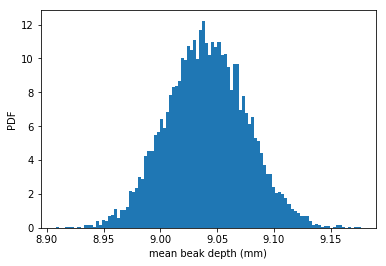

In [14]:
_ = plt.hist(bs_replicates_1975, bins=100, normed=True)
plt.xlabel('mean beak depth (mm)')
plt.ylabel('PDF')

It looks Normally distributed, and in fact it must be by the Central Limit Theorem. The most probable mean we would get is 8.96 mm, which was what was measured, but upon repeating the experiment, we could get a mean as low as about 8.7 mm or as high as about 9.2 mm.

## Check both 95 % confidence intervals

In [15]:
conf_int_1975 = np.percentile(bs_replicates_1975, [2.5, 97.5])
conf_int_1975

array([8.97333451, 9.11048216])

In [16]:
conf_int_2012 = np.percentile(bs_replicates_2012, [2.5, 97.5])
conf_int_2012

array([8.94700077, 9.13572053])

So, the 95% confidence intervals for the 2012 and 1975 juuust miss each other. This implies that the inherent variation in beak depths is likely not responsible for the observed difference. There was likely some selective pressure toward deeper beaks.

## Hypothesis test: Are beaks deeper in 2012?

Plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [22]:
#Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975_beak_depth, bd_2012_beak_depth)))

#shift the samples
bd_1975_shifted = bd_1975_beak_depth - np.mean(bd_1975_beak_depth) + combined_mean
bd_2012_shifted = bd_2012_beak_depth - np.mean(bd_2012_beak_depth) + combined_mean

#get boostrap replicates of shifted datasets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.9997


## EDA of beak length and depth

The beak lenth is stored in beak_length, in mms, So make scatter plots of beak_depth (y-axis), versus beak length (x-axis) for the 1976 and 2012 specimens.

In [23]:
df_all.head(3)

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975


In [25]:
#exctract values from table
bl_1975=df_all[df_all['year']==1975]['beak_length'].values
bd_1975=df_all[df_all['year']==1975]['beak_depth'].values
bl_2012=df_all[df_all['year']==2012]['beak_length'].values
bd_2012=df_all[df_all['year']==2012]['beak_depth'].values

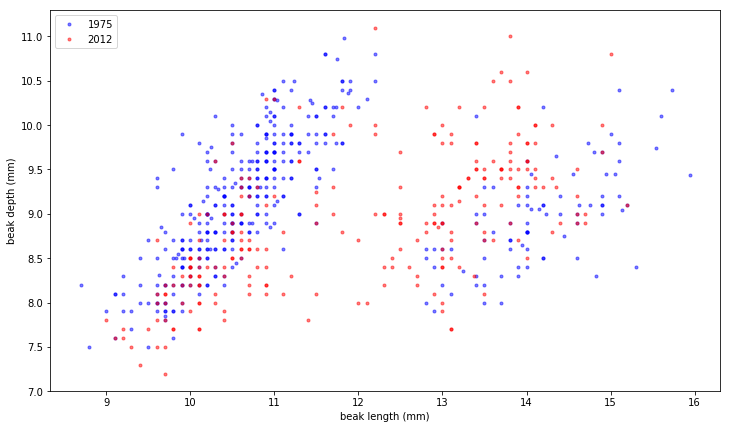

In [26]:
plt.figure(figsize=(12,7))

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

By looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer.
If anything, they got a bit shorter, since the red dots are to the left of the blue dots.
So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Linear regressions
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

Use the draw_bs_pairs_linreg() function.

As a reminder, its call signature is draw_bs_pairs_linreg(x, y, size=1), and it returns bs_slope_reps and bs_intercept_reps.

In [27]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps



In [28]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.0945968320892116 conf int = [0.05634577 0.1322646 ]
1975: intercept = 8.053907980716424 conf int = [7.61873458 8.51129385]
2012: slope = 0.279421483961125 conf int = [0.23660635 0.31916057]
2012: intercept = 5.548559204612314 conf int = [5.05778491 6.06574558]


# Graph the linear regression results
Display linear regression results on the scatter plot, the code for which is already pre-written from your exercise. To do this, take the first 100 bootstrap samples (stored in bs_slope_reps_1975, bs_intercept_reps_1975, bs_slope_reps_2012, and bs_intercept_reps_2012) and plot the lines with alpha=0.2 and linewidth=0.5 keyword arguments to plt.plot().

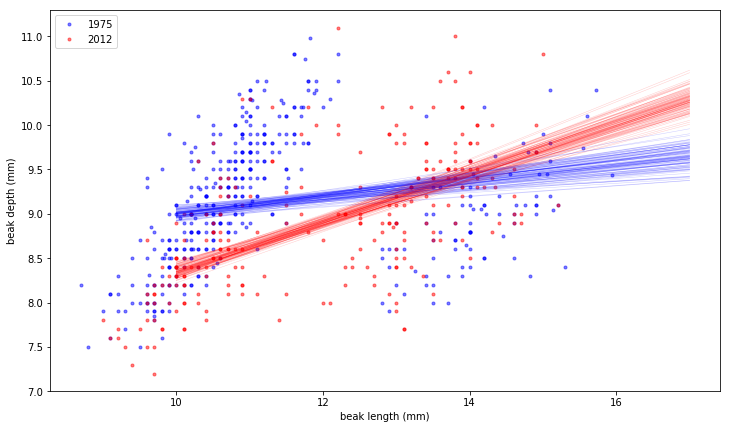

In [29]:
plt.figure(figsize=(12,7))

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [30]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.2461609991094327 conf int = [1.22304063 1.27042372]
2012: mean ratio = 1.3483617710027853 conf int = [1.32431766 1.3728382 ]


## EDA of heritability
The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.

In [31]:
#import csv of heritability to a df
df_fortis_h = pd.read_csv('fortis_beak_depth_heredity.csv')
print(df_fortis_h.head())
df_scandens_h = pd.read_csv('scandens_beak_depth_heredity.csv')
print(df_scandens_h.head())


   Mid-offspr  Male BD  Female BD
0       10.70    10.90        9.3
1        9.78    10.70        8.4
2        9.48    10.70        8.1
3        9.60    10.70        9.8
4       10.27     9.85       10.4
   mid_parent  mid_offspring
0      8.3318         8.4190
1      8.4035         9.2468
2      8.5317         8.1532
3      8.7202         8.0089
4      8.7089         8.2215


In [38]:
#create a df for parent and offspring of each species
bd_parent_scandens = df_scandens_h['mid_parent'].values
bd_offspring_scandens = df_scandens_h['mid_offspring'].values
bd_parent_fortis = (df_fortis_h['Male BD'].values + df_fortis_h['Female BD'].values)/2
bd_offspring_fortis = df_fortis_h['Mid-offspr'].values

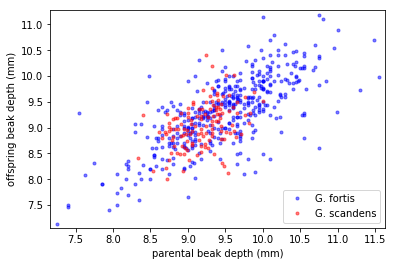

"\nIt appears as though there is a stronger correlation in G. fortis than in G. scandens. \nThis suggests that beak depth is more strongly inherited in G. fortis. \nWe'll quantify this correlation next.\n"

In [39]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()
'''
It appears as though there is a stronger correlation in G. fortis than in G. scandens. 
This suggests that beak depth is more strongly inherited in G. fortis. 
We'll quantify this correlation next.
'''

## Correlation of offspring and parental data
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

## Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

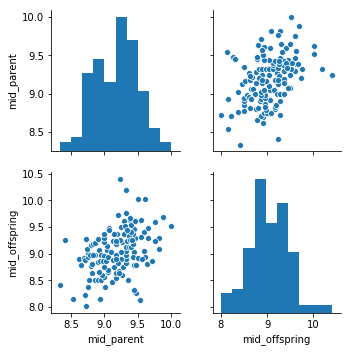

In [40]:
sns.pairplot(df_scandens_h)
plt.show()

In [34]:
#function for pearson coefficient calculation
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [36]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates
    bs_replicates = np.empty(size)
    # bs_intercept_reps = ____

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)
        # bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_replicates

In [41]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)
'''
It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents 
is more strongly correlated with their offspring than their G. scandens counterparts.
'''

G. scandens: 0.4117063629401258 [0.26897108 0.54773714]
G. fortis: 0.7283412395518487 [0.66890748 0.77941679]


'\nIt is clear from the confidence intervals that beak depth of the offspring of G. fortis parents \nis more strongly correlated with their offspring than their G. scandens counterparts.\n'

## Measuring heritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.



In [44]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

'''Here again, we see that G. fortis has stronger heritability than G. scandens. 
This suggests that the traits of G. fortis may be strongly incorporated into 
G. scandens by introgressive hybridization.'''

G. scandens: 0.5485340868685982 [0.34328411 0.745637  ]
G. fortis: 0.7229051911438156 [0.64471874 0.79544421]


'Here again, we see that G. fortis has stronger heritability than G. scandens. \nThis suggests that the traits of G. fortis may be strongly incorporated into \nG. scandens by introgressive hybridization.'

## Is beak depth heritable at all in G. scandens?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [46]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)
'''You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. 
This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. 
If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.'''

p-val = 0.0


'You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. \nThis strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. \nIf you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.'